In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, scatter_matrix
import numpy as np
import seaborn as sns
%matplotlib inline

# dataset=pd.read_csv('adult.data',delimiter=",")
# dataset=pd.read_csv('adult.test',delimiter=",")
# dataset=pd.read_csv('adult.names',delimiter=",")
# missing_val=['n/a','-','?']
dataset = pd.read_csv('adult.data', delimiter = ',', index_col = False, names = ["age", "workclass", "final_weight", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "class"])
dataset=dataset[dataset.workclass != ' ?']
dataset=dataset[dataset.occupation != ' ?']
dataset=dataset[dataset.native_country != ' ?']
data=pd.DataFrame(dataset)

# data=data[data["workclass"]!='?']
# data=data[data["occupation"]!='?']
# data=data[data["native_country"]!='?']
data.head()
# dataset.head().transpose()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [67]:
data.loc[:50]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,Age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"(33.0, 41.0]"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"(49.0, 58.0]"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(33.0, 41.0]"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"(49.0, 58.0]"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"(25.0, 33.0]"
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,"(33.0, 41.0]"
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,"(41.0, 49.0]"
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,"(49.0, 58.0]"
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,"(25.0, 33.0]"
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,"(41.0, 49.0]"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   final_weight    30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  class           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#Get overall information of the dataset
dataset.shape

(30162, 15)

In [11]:
#Checking dataset columns
dataset.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class'],
      dtype='object')

In [15]:
#Get more info about the dataset
dataset.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
#Check to see if there is any null values
dataset.isnull().values.any()

False

In [14]:
#checking for missing values
dataset.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

In [17]:
dataset.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

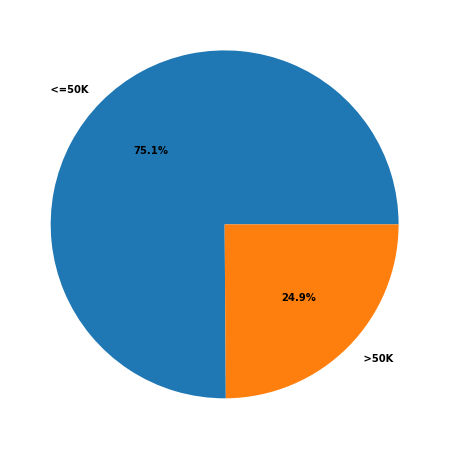

In [23]:
dataset['class'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(dataset['class'].value_counts(),labels=dataset['class'].value_counts().index,shadow=False, autopct='%1.1f%%',textprops={'weight': 'bold'})
plt.show()

In [20]:
dataset['class'].value_counts().index

Index([' <=50K', ' >50K'], dtype='object')

In [74]:
dataset['sex'].value_counts()

 Male      20380
 Female     9782
Name: sex, dtype: int64

In [19]:
#Checking data type.Analyze object data and integer data respectively. 
dataset.dtypes

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
class             object
dtype: object

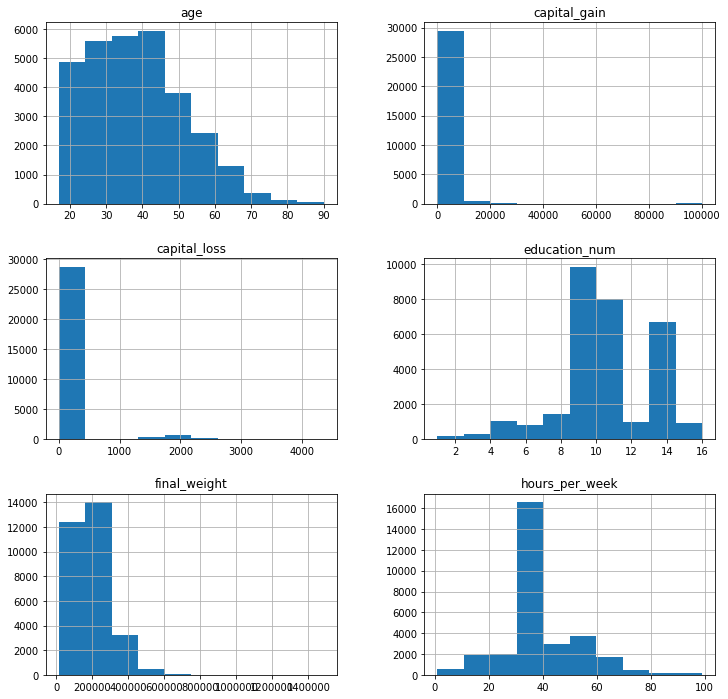

In [9]:
#plotting histograms for integers
#get overall shape of dataset
dataset.hist(figsize=(12,12))
plt.show()

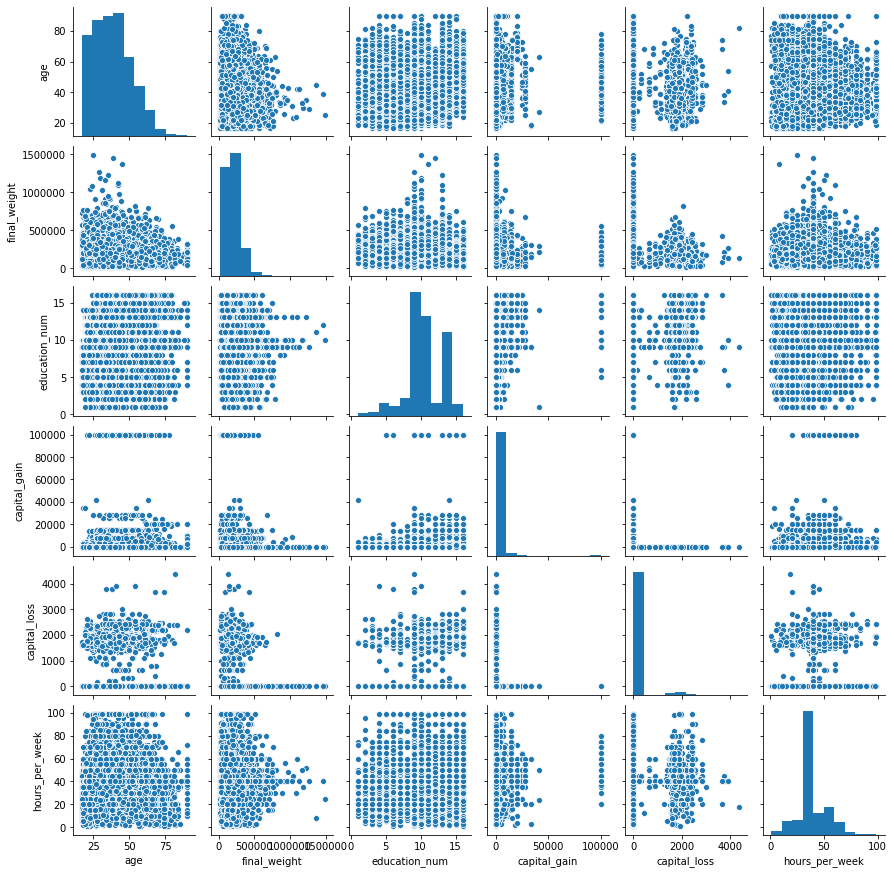

In [10]:
#Checking to see if there is any correlation
sns.pairplot(dataset, height=2.0)
# sns.pairplot(dataset, height=2.0, diag_kind= 'kde', hue = 'class')
plt.show()

##Cannot see if there are any correlation across all graph. the datapoints are too scattered.

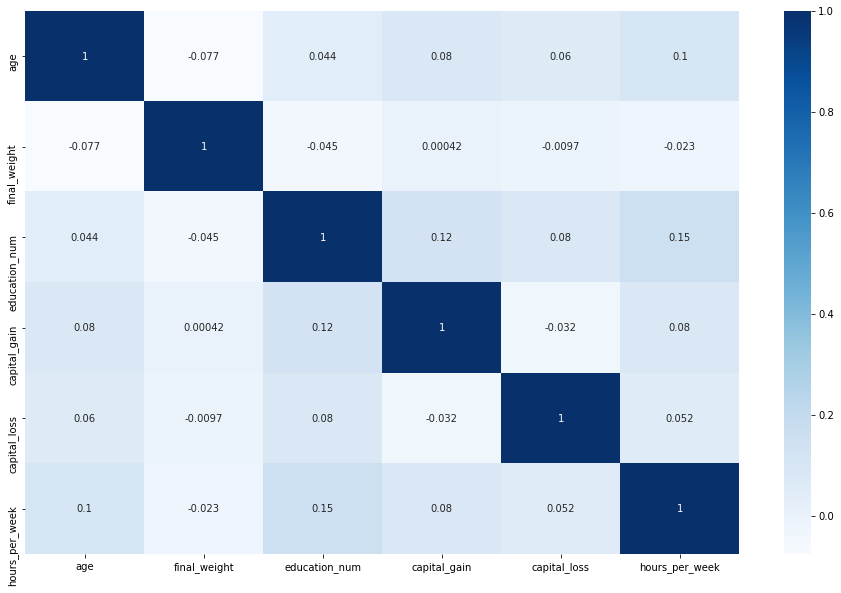

In [11]:
## Use heatmap to visualize the correlation between attributes. 
## Darker blues to show a positive correlation, white blues to show a negative correlation. 
## Figure below doesn't look like there's too much of a negative/positive correlation besides diagonal values (as it's age-age, fnlwgt-fnlwgt, etc). 

ax, fig = plt.subplots(figsize = (16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "Blues")
plt.show()

In [43]:
categorical_feature_mask = data.dtypes == "object"
categorical_cols = dataset.columns[categorical_feature_mask].tolist()
data[categorical_cols]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [44]:
data.loc[:50]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [26]:
a=dataset['workclass'].unique()
print(a)

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


In [27]:
a=dataset['occupation'].unique()
print(a)

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']


In [28]:
a=dataset['native_country'].unique()
print(a)

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [35]:

print("Missing value count occupation: ", data['occupation'].isnull().sum())
print("Missing value count work-class: ", data['workclass'].isnull().sum())
print("Missing value count native-country: ", data['native_country'].isnull().sum())

Missing value count occupation:  0
Missing value count work-class:  0
Missing value count native-country:  0


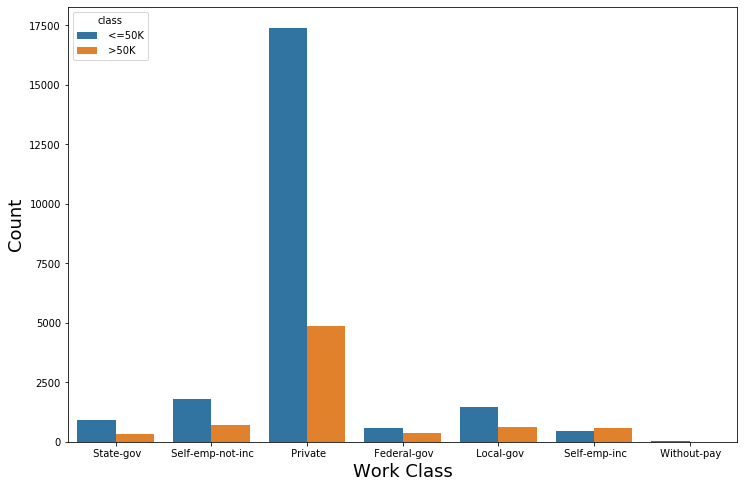

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='workclass', hue='class', data = data,orient='h')
plt.xlabel('Work Class', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=0)
plt.show()

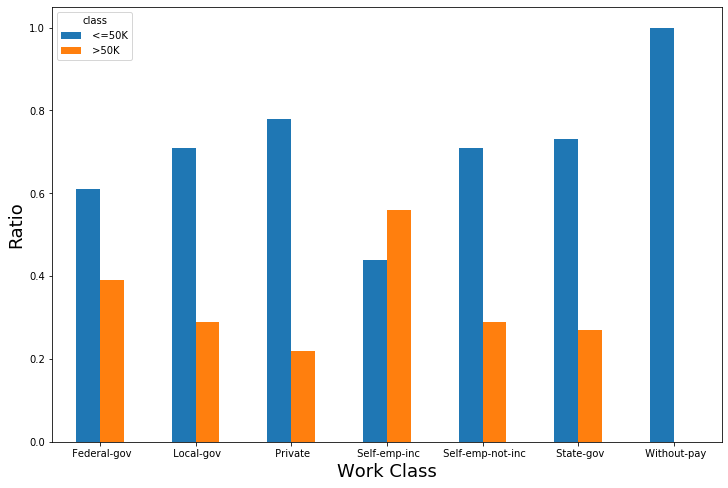

In [25]:
workclass = round(pd.crosstab(data['workclass'], data['class']).div(pd.crosstab(data['workclass'], data['class']).apply(sum,1),0),2)
# workclass.sort_values(by = '>50K', inplace = True)
# workclass.plot(kind ='bar', title = 'Proportion distribution across workclass', figsize = (12,8), rot=30)
workclass.plot(kind ='bar',  figsize = (12,8), rot=30)
plt.xlabel('Work Class', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.xticks(rotation=0)
plt.show()

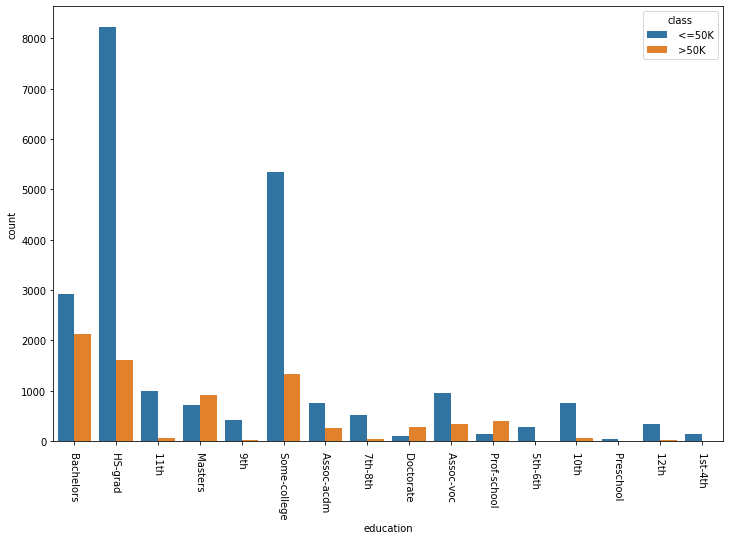

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='education', hue='class', data = data[categorical_cols])
plt.xticks(rotation=-90)
plt.show()

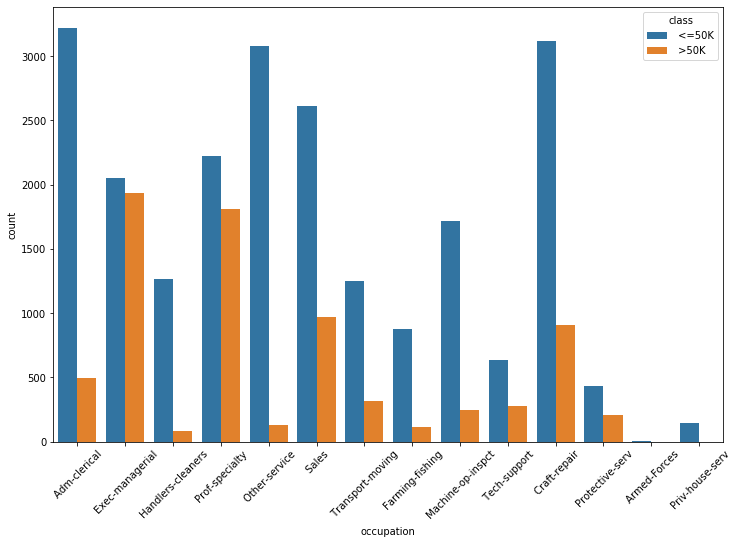

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='occupation', hue='class', data = data[categorical_cols])
plt.xticks(rotation=45)
plt.show()

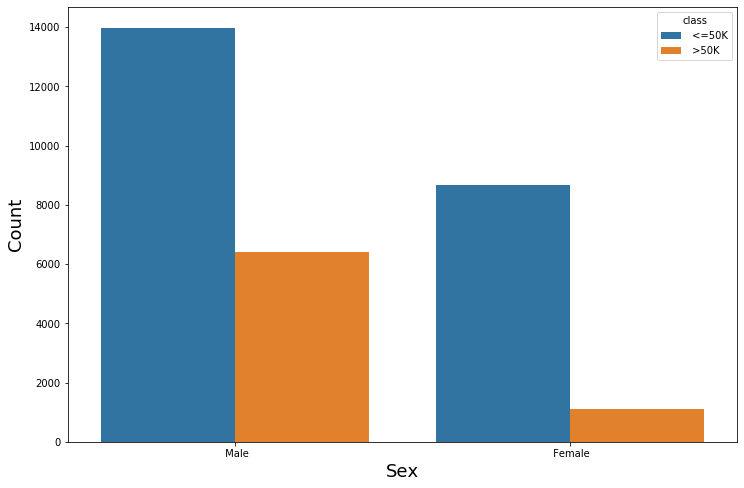

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x='sex', hue='class', data = data)
plt.xlabel('Sex', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

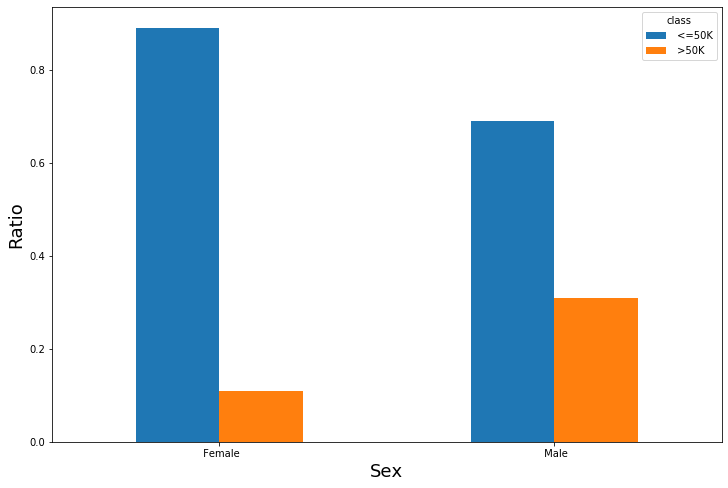

In [27]:
sex = round(pd.crosstab(data['sex'], data['class']).div(pd.crosstab(data['sex'], data['class']).apply(sum,1),0),2)
# gender.sort_values(by = '>50K', inplace = True)
# sex.plot(kind ='bar', rot=0, title = 'Proportion distribution across sex')
# sex.plot(kind ='bar', title = 'Proportion distribution between sex', figsize = (12,8), rot=30)
sex.plot(kind ='bar',  figsize = (12,8), rot=30)
plt.xlabel('Sex', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.xticks(rotation=0)
plt.show()

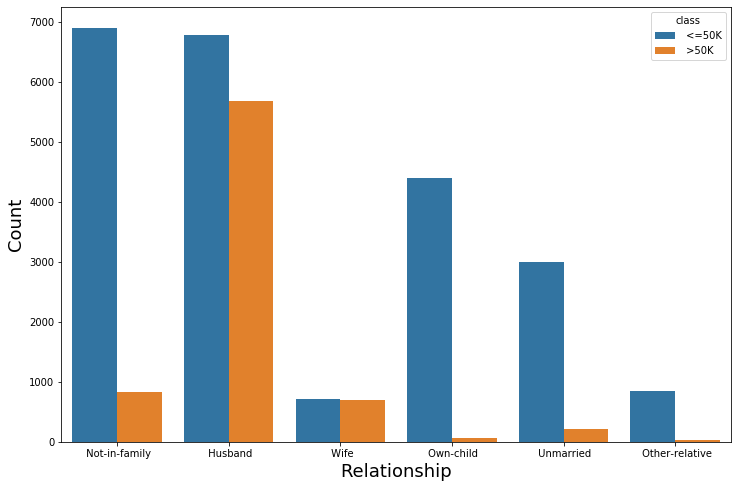

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x='relationship', hue='class', data = data)
plt.xlabel('Relationship', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

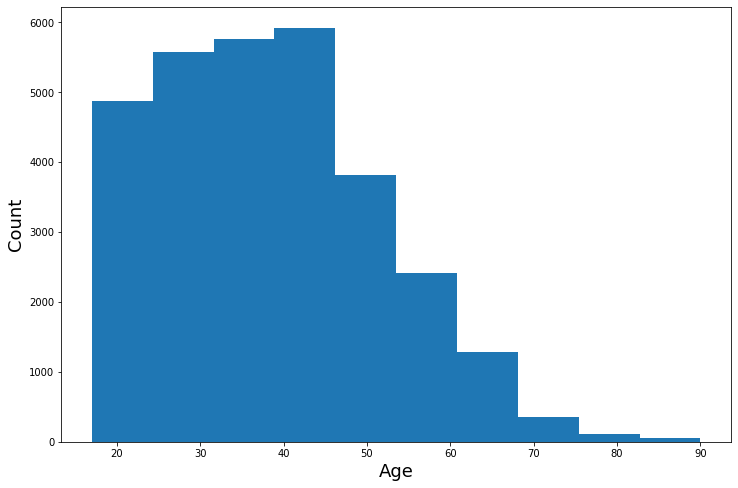

In [24]:
plt.figure(figsize=(12,8))
plt.hist(data['age'])
# plt.title('Distribution of the Age')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

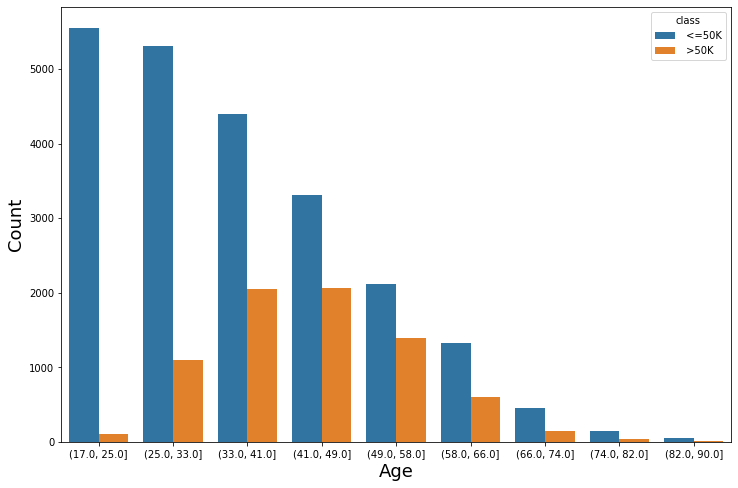

In [58]:
data['Age'] = pd.cut(data['age'], 9, precision=0)

# Plotting count plot for age and income
fig = plt.figure(figsize=(12,8))
sns.countplot(x="Age", hue="class", data=data)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

Text(0, 0.5, 'Age')

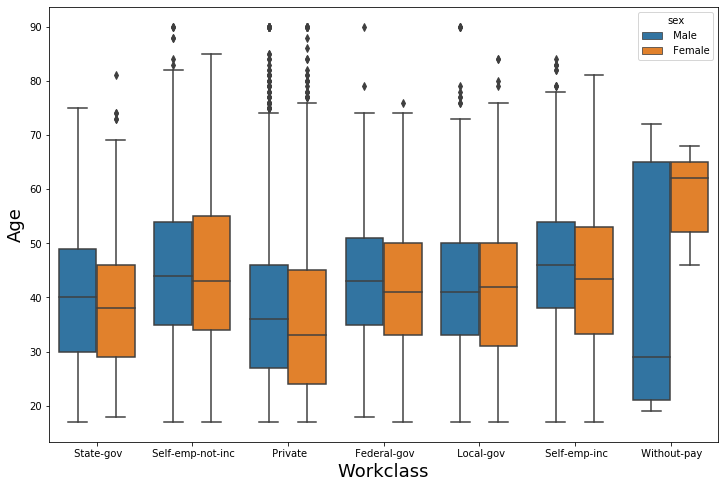

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x="workclass",y="age", hue="sex", data=data)
plt.xlabel('Workclass', fontsize=18)
plt.ylabel('Age', fontsize=18)

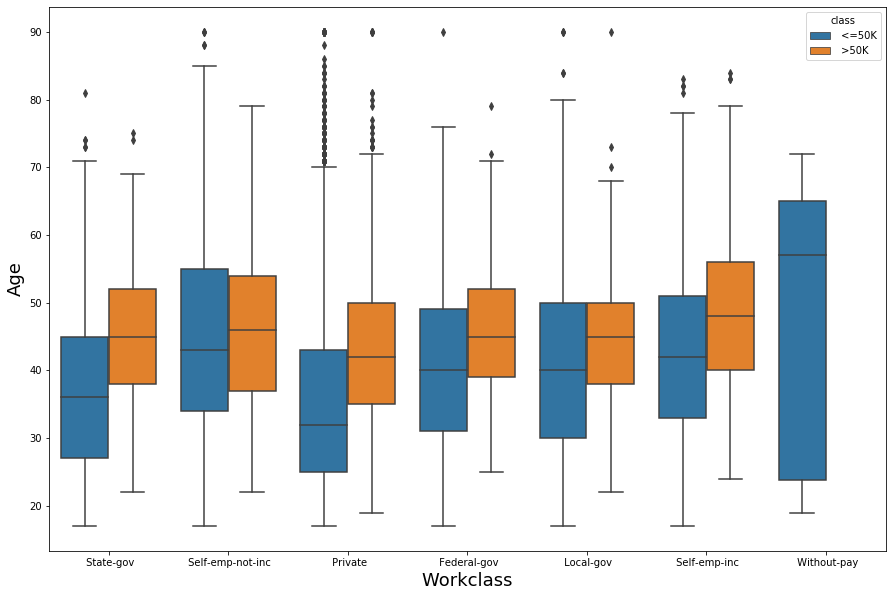

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(x="workclass",y="age", hue="class", data=data)
plt.xlabel('Workclass', fontsize=18)
plt.ylabel('Age', fontsize=18)
plt.show()